# Introduction
Geospatial Analytics can add more value in data and visualizing data over Map is the ultimate info graphic. 
As I am currently working with the People movement data, it hardly makes sense for the general people when visualizing as some metrics. Visualizing these points over the map starts to tell stories and makes it understandable.
Creating trajectories from millions of points relative to time can give deeper information from data. Trying to unfold what lies ahead. 


In [ ]:
# Here I'll use the kaggle dataset from Geospatial Data Analysis Course https://www.kaggle.com/alexisbcook/geospatial-learn-course-data
# At first let me Mount my drive to get the dataset
HOME_PATH = "/content"
%cd "$HOME_PATH"
from google.colab import drive 
drive.mount("/content/drive")
# Kaggle dataset path
DATASET_PATH = "/content/drive/My Drive/Data Science/data/geospatial-data/kaggle/"

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Intorduction to geopandas 
https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb
**bold text**



In [ ]:
%%time 
#To install geopandas follow this
#Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
#Install rtree - Geopandas requirment
!apt install python3-rtree 
#Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
#Install descartes - Geopandas requirment
!pip install descartes 
#Install Folium for Geographic data visualization
!pip install folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,369 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [ ]:
!pip install plotly==5.1.0
#Install plotlyExpress
!pip install plotly_express

     |████████████████████████████████| 20.6MB 1.5MB/s 
  Found existing installation: plotly 4.5.0
    Uninstalling plotly-4.5.0:
      Successfully uninstalled plotly-4.5.0


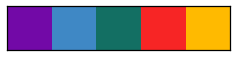

In [ ]:
# Import libraries 
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns in pandas
import geopandas as gpd 
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium 
import plotly_express as px
import seaborn as sns
import json
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
def custom_palette(custom_colors):
  custome_palette = sns.set_palette(sns.color_palette(custom_colors))
  sns.palplot(sns.color_palette(custom_colors), size=0.8)
  plt.tick_params(axis='both', labelsize=0, length=0)
palette = ["#7209A7", "#3F88C5", "#136F63", "#F72525", "#FFBA00"]
custom_palette(palette)
import time
import datetime
from datetime import date, timedelta

In [ ]:
# Read in the shapefile containing information about forests, wilderness areas, and other lands 
# under the care of the Department of Environmental Conservation in the state of New York. 
ny_declands_data = gpd.read_file(f"{DATASET_PATH}/DEC_lands/DEC_lands/DEC_lands.shp")

# Preview the first five rows of the data
ny_declands_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [ ]:
ny_declands_data.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2983 non-null   int64   
 1   CATEGORY    2983 non-null   object  
 2   UNIT        2473 non-null   object  
 3   FACILITY    2976 non-null   object  
 4   CLASS       1219 non-null   object  
 5   UMP         2347 non-null   object  
 6   DESCRIPTIO  480 non-null    object  
 7   REGION      2983 non-null   int64   
 8   COUNTY      2983 non-null   object  
 9   URL         2983 non-null   object  
 10  SOURCE      2983 non-null   object  
 11  UPDATE_     2949 non-null   object  
 12  OFFICE      2811 non-null   object  
 13  ACRES       2983 non-null   float64 
 14  LANDS_UID   2983 non-null   int64   
 15  GREENCERT   2982 non-null   object  
 16  SHAPE_AREA  2983 non-null   float64 
 17  SHAPE_LEN   2983 non-null   float64 
 18  geometry    2983 non-null   geometry
dty

In [ ]:
# Let's get a copy of the data for our analysis
temp_data = ny_declands_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy() # Use .copy method to deepcopy the dataframe or else changes in the shallow copied dataframe will effect the main dataframe

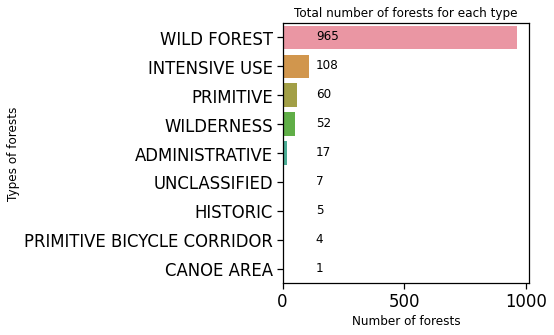

In [ ]:
# Now let's take a look at how many lands of each CLASS is there
res=temp_data.CLASS.value_counts()
# Let's plot a histogram from the result
plt.figure(figsize=(8,5))
label_size = 14
value_size = 12
g=sns.barplot(x=res.values, y=res.keys())
for p in g.patches:
  x = (res.max() - res.min()) // (res.count()-2)
  y = p.get_y() + 0.6
  g.annotate('{:.0f}'.format(p.get_width()), (x, y), 
             ha='left', va='bottom',
             color='black', fontsize=value_size)
plt.ylabel('Types of forests', fontsize=value_size)
plt.xlabel('Number of forests', fontsize=value_size)
title='Total number of forests for each type'
plt.title(title, fontsize=value_size)
plt.tight_layout()
plt.show()

In [ ]:
#g=temp_data.geometry.to_json()

In [ ]:
class_map=temp_data.CLASS.unique().tolist()
class_map.index('WILDERNESS')
temp_data['class_color']=temp_data.CLASS.apply(lambda x: float(class_map.index(x)))

In [ ]:
#temp_data=temp_data.dropna(subset=['CLASS'])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
poly_json = temp_data.to_json()

fig = px.choropleth(temp_data, 
                    geojson=temp_data.geometry, # Geojson needs Plotly version greater than 4.5
                    locations=temp_data.index, 
                    color='class_color',
                           #color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                    #scope="asia",
                           #labels={'unemp':'unemployment rate'}
                      )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  mapbox = {
                      'style':'open-street-map',
                      'zoom':12,
                  })
#fig.layout.template= None
fig.show()

In [ ]:
# Let's select lands that fall under the "Wild Forest" or "Wilderness" category
wild_lands = temp_data.loc[temp_data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry,class_color
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4...",0.0
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4...",0.0
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4...",0.0
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4...",0.0
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4...",0.0


In [ ]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

While this column can contain a variety of different datatypes, each entry will typically be a Point, LineString, or Polygon.
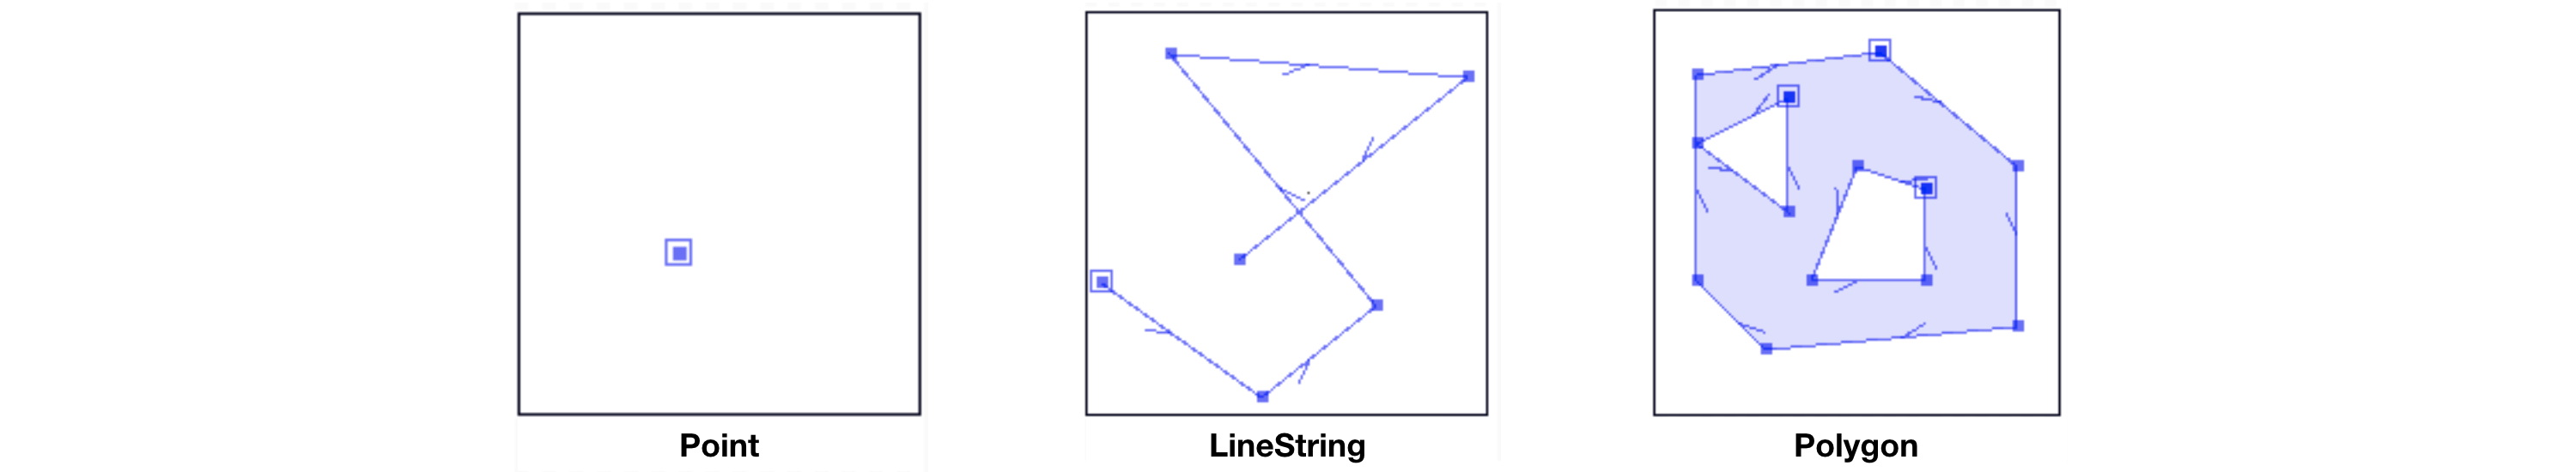
The "geometry" column in our dataset contains 2983 different Polygon objects, each corresponding to a different shape in the plot above.

In the code cell below, we create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

In [ ]:
# Campsites in New York state (Point)
POI_data = gpd.read_file(f'{DATASET_PATH}DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp')
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file(f'{DATASET_PATH}DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp')
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file(f'{DATASET_PATH}NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp')

Next, we create a map from all four GeoDataFrames.

The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

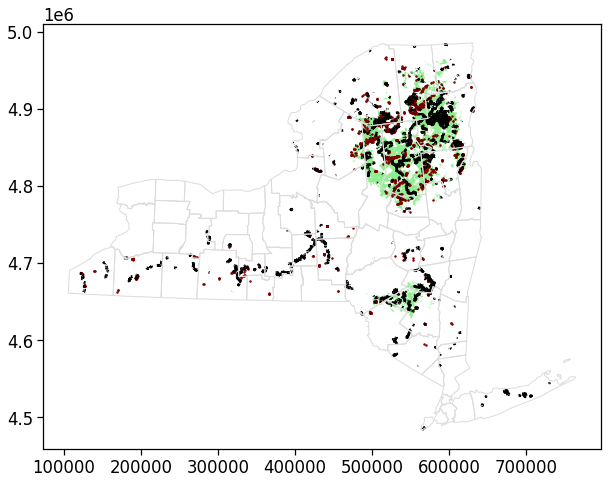

In [ ]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)